In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Implement these procedures to obtain new features (you can use the function you implement for the last homework Exercise 2.2). In the sequel, we only use these new features

In [2]:
# prepare data

data = pd.read_csv("year-sunspots-republicans.csv")
data["Year"] = (data["Year"] - 1960)/40

# create the different basis


def polynomial_basis(x):
    """
    Create an array of polynomial features $\phi_j(x)=x^j$ for j=0,...,5.

    Parameters:
        - x (np.array): of size n.

    Returns:
        - features (np.array): of shape (n, 6).
    """
    power = np.arange(0, 6)
    x = np.resize(x, (6, x.shape[0]))
    features = (x.T)**power

    return features


def basis_b(x):
    """
    Create the second basis.

    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 11).
    """

    n = x.shape[0]

    mu_j = np.arange(0, 51, 5)
    x = np.resize(x, (11, x.shape[0]))

    features = np.exp((-(40*x.T-mu_j)**2)/25)
    features = np.hstack((np.ones((n, 1)), features))

    return features


def basis_c(x):
    """
    Create the third basis.

    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 6).
    """

    n = x.shape[0]

    j = np.arange(1, 6)
    x = np.resize(x, (5, x.shape[0]))

    features = np.cos((x.T)/j)
    features = np.hstack((np.ones((n, 1)), features))

    return features


def basis_d(x):
    """
    Create the fourth basis.

    Parameters:
        - x (np.array): of size n.
    Returns:
        - basis (np.array): of shape (n, 26).
    """
    n = x.shape[0]

    j = np.arange(1, 26)
    x = np.resize(x, (25, x.shape[0]))

    features = np.cos((x.T)/j)
    features = np.hstack((np.ones((n, 1)), features))

    return features


### 2. • Plot the data and the Bayesian predictor for each of the following sets of basis functions, and include the generated plot as an image in your submission.
### • For each set of basis functions, compute the posterior standard deviation x′ 7→ σN (x′) and illustrate the predictive uncertainty by plotting a shaded region, that spans σN (x′) either side of ˆyD(x′).

In [3]:
from matplotlib import markers
from matplotlib.pyplot import show

def compute_averaged_squared_error(X, y, w):
    """
    Given the matrix of features, the parameters of the linear regression and the vector of targets,
    returns the squared distance between the predictions and the ground truth.
    
    Parameters:
        - X (np.array): features.
        - y (np.array): target values, of shape (n,).
        - w (np.array): parameters of the linear regression.
    Returns:
        - error (float): the averaged squared distance between the predictions and the ground truth.
    """
    error = (np.linalg.norm((y - X@w)))**2
    n = y.shape[0]
    return error/n
    

def compute_posterior(X, y, alpha, beta, compute_variance = True):
    """compute posterior mean and posterior variance given precision for the prior and precision for the likelihood

    Args: 
        X (array) : matrix of features 
        y (array) : output array
        alpha (float): precision of the prior
        beta (float): precision of the likelihood

    Returns:
        (float,float): posterior mean and posterior variance
    """
    posterior_variance = 0
    # compute the posterior mean (note we need the posterior variance to compute posterior mean)
    d = X.shape[1]

    s_0 = (1/alpha)*np.eye(d)
    s_0_inv = np.linalg.solve(s_0, np.eye(d))
    
    s_n = np.linalg.solve(s_0_inv + (beta*X.T@X), np.eye(d)) 

    posterior_mean = s_n@(beta*X.T@y)  

    if compute_variance == True:
        posterior_variance = s_n

    return posterior_mean, posterior_variance


# function to plot results

def plot_Bayes(x, y, basis_function, alpha = 0.01, beta = 1, show_uncertainty = True):
    """ plot the data (x,y) and the Bayesian predictor (ie posterior mean)

    Args:
        x (array): the input array
        y (array): the output array
        basis_function (string): name of the function that return the design matrix or matrix of features
        alpha (float): precision of the prior (precision = 1/variance)
        beta (float): precision of the likelihood
        show_uncertainty (bool, optional): plot the shaded region. Defaults to True.
    """
    # create the basis 
    X = eval(basis_function + "(x)")

    # get the posterior mean and posterior variance
    
    posterior_mean, posterior_variance = compute_posterior(X, y, alpha, beta, compute_variance=show_uncertainty)
           
    y_pred = X@posterior_mean

    fig, ax = plt.subplots()
    ax.scatter(x, y, label ="true value")
    ax.plot(x,y_pred, label = "prediction",  c = "orange")
    
    if show_uncertainty == True:
        
        # compute the lower and higher bound for y
        y_pred_lower = y_pred - np.sqrt(np.diag(1/beta + X@posterior_variance@X.T))
        y_pred_higher = y_pred + np.sqrt(np.diag(1/beta + X@posterior_variance@X.T))

        uncertainty = np.array([y_pred_lower, y_pred_higher])
        ax.fill_between(x,uncertainty[0],uncertainty[1], color = "orange", alpha = 0.3, label="confidence interval")
        
    ax.legend()
    ax.set_title("Bayesian prediction using " + str(basis_function))
    
    # print the error
    error = compute_averaged_squared_error(X, y, posterior_mean)
    plt.show()
    print(f'Training error unsing {str(basis_function)}: {error: .3f}')
    

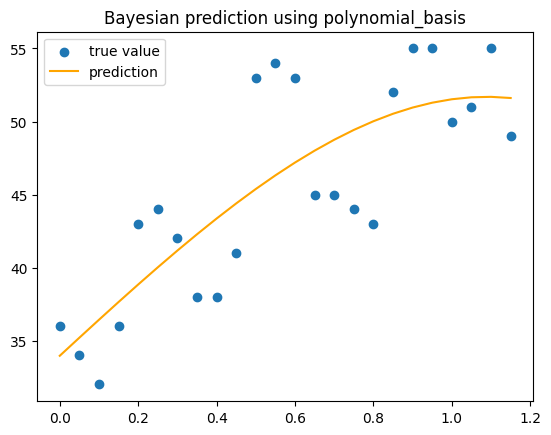

Training error unsing polynomial_basis:  17.740


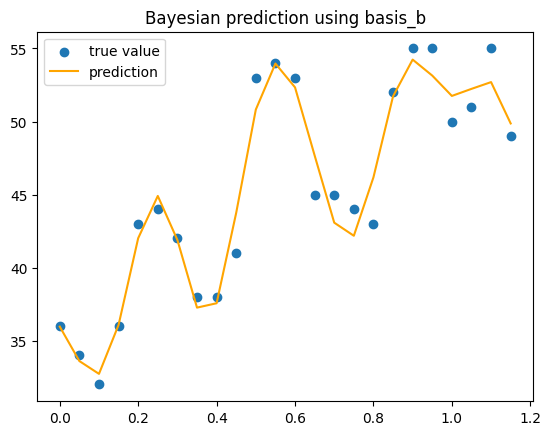

Training error unsing basis_b:  2.294


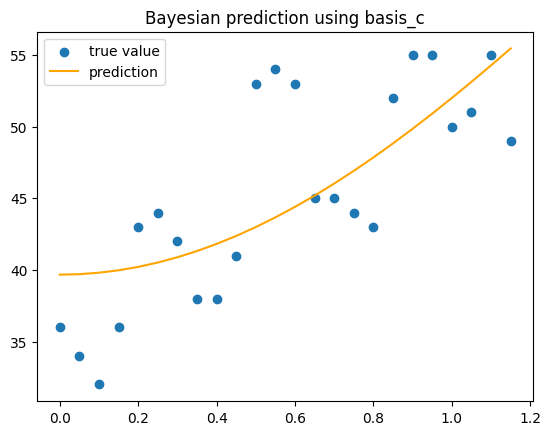

Training error unsing basis_c:  24.552


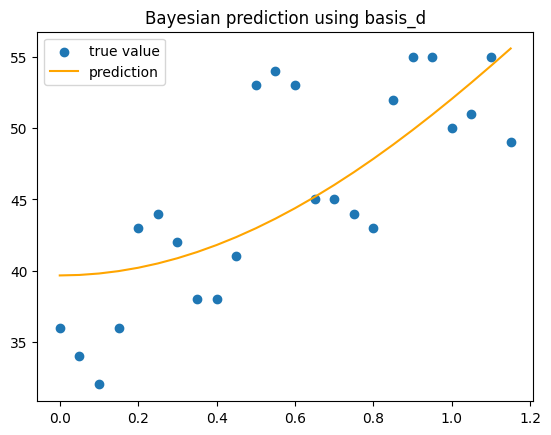

Training error unsing basis_d:  24.649


In [4]:
x = data["Year"]
y = data["Republican_Count"]

plot_Bayes(x, y, "polynomial_basis", show_uncertainty=False)
plot_Bayes(x, y, "basis_b", show_uncertainty=False)
plot_Bayes(x, y, "basis_c", show_uncertainty=False)
plot_Bayes(x, y, "basis_d", show_uncertainty=False)


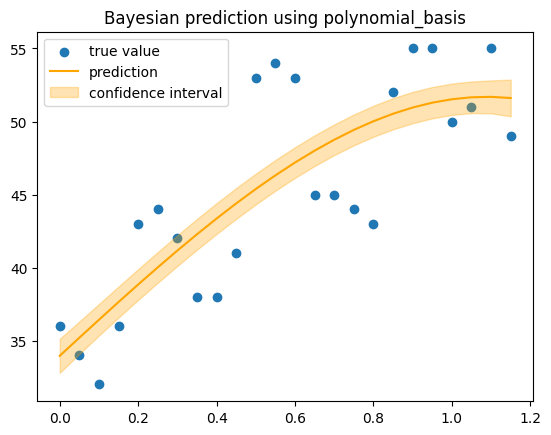

Training error unsing polynomial_basis:  17.740


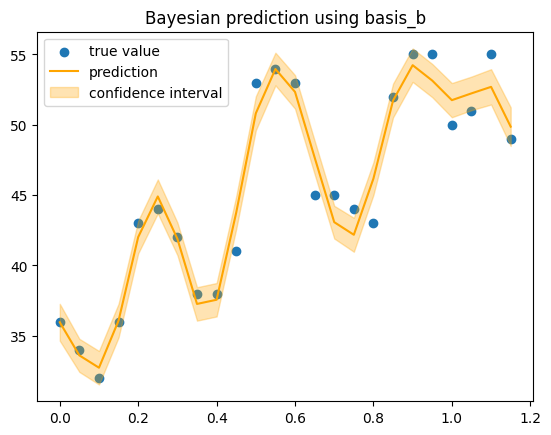

Training error unsing basis_b:  2.294


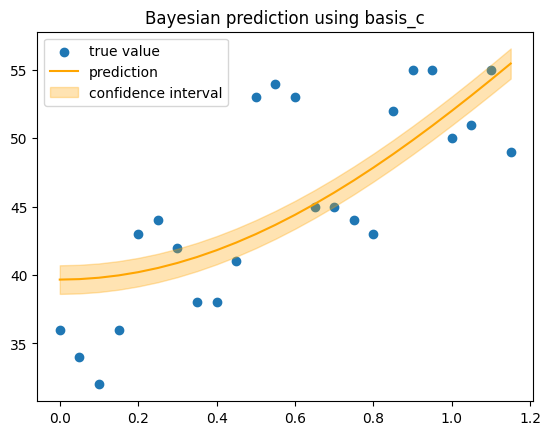

Training error unsing basis_c:  24.552


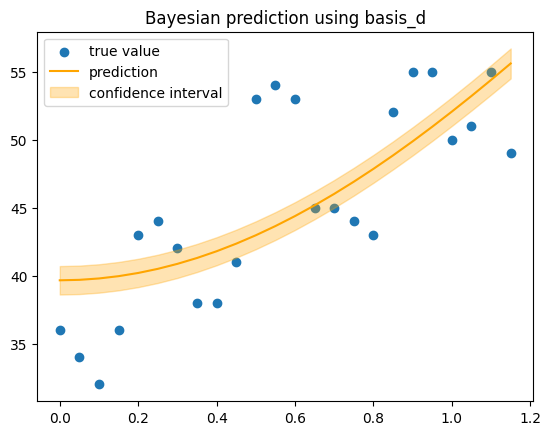

Training error unsing basis_d:  24.649


In [5]:
plot_Bayes(x, y, "polynomial_basis")
plot_Bayes(x, y, "basis_b")
plot_Bayes(x, y, "basis_c")
plot_Bayes(x, y, "basis_d")


### 3. Repeat the same exact process as above but for Number of Sunspots (x-axis) v. Number of Republicans in the Senate (y-axis). Here, to avoid numerical instability with numbers in the Sunspot Count column, we will also scale the data first by dividing all “sunspot count” inputs by 20. In addition, only use data from before 1985, and only use basis functions (a), (c), and (d) – ignore basis (b). You will therefore make 3 total plots. For each plot make sure to also include the train error.

In [6]:
# preparing data

data["Sunspot_Count"] = data["Sunspot_Count"]/20
data = data[data["Year"] <= (1985-1960)/40]

# we sort values for plotting issues
data = data.sort_values("Sunspot_Count")

x = data["Sunspot_Count"]
y = data["Republican_Count"]


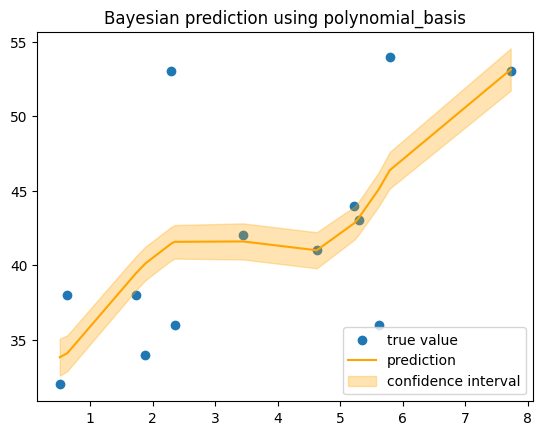

Training error unsing polynomial_basis:  28.048


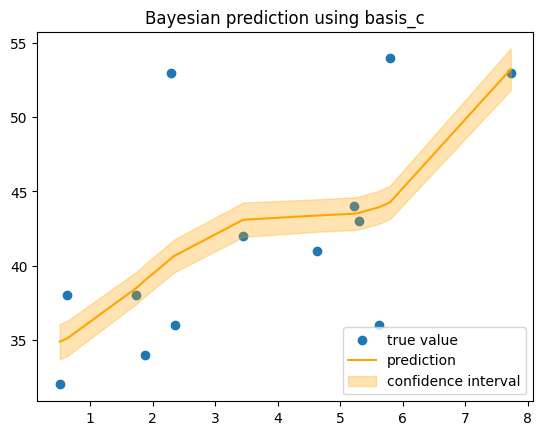

Training error unsing basis_c:  29.674


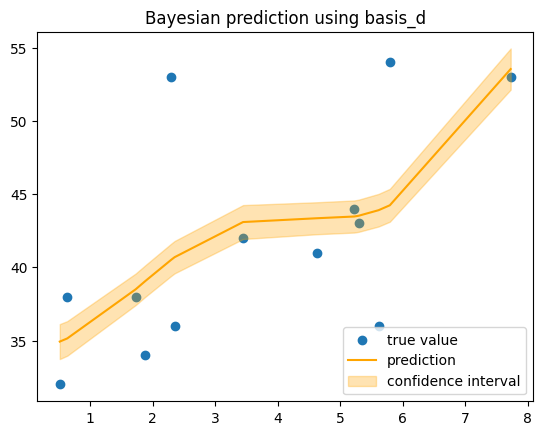

Training error unsing basis_d:  29.679


In [7]:
plot_Bayes(x, y, "polynomial_basis")
plot_Bayes(x, y, "basis_c")
plot_Bayes(x, y, "basis_d")


### 4. Compute the marginal likelihood (or normalizing constant) for the the three bases (a, c, d).

In [8]:
# We compute the log marginal likelihood, otherwise the marginal likelihood are too closed to 0 to be compared.

def log_marginal_likelihood(x, y, basis_function, alpha=0.01, beta=1):
    """compute the log marginal likelihood of the model

    Args:
        X (array): input vector
        y (array): target vector
        alpha (float): precision for the prior
        beta (float): precision for the likelihood
        basis_function (function): function to be used to create the space of features X

    Returns:
        float: log marginal likelihood of model
    """
    X = eval(basis_function + "(x)")
    posterior_mean, posterior_variance = compute_posterior(X, y, alpha, beta)
    n = X.shape[0]
    d = X.shape[1]

    # compute the log marginal likelihood
    post_var_inv = np.linalg.solve(posterior_variance, np.eye(d))

    a = (d/2)*np.log(alpha) + (n/2)*np.log(beta) - 0.5*np.log(np.linalg.det(post_var_inv)) - (n/2)*np.log(2*np.pi)
    b = -beta*0.5*(np.linalg.norm(y - X@posterior_mean))**2 - \
        0.5 * (alpha) * (np.linalg.norm(posterior_mean))**2

    z = a + b

    return z



In [9]:
ml1 = (log_marginal_likelihood(x, y, "polynomial_basis"))
ml2 = (log_marginal_likelihood(x, y, "basis_c"))
ml3 = (log_marginal_likelihood(x, y, "basis_d"))


print(
    f"the log marginal likelihood for model with polynomial basis (model 1) is: {ml1: .3f}")

print(
    f"the log marginal likelihood for model with basis c (model 2) is: {ml2: .3F}")

print(
    f"the log marginal likelihood for model with basis d (model 3) is: {ml3: .3f}")


the log marginal likelihood for model with polynomial basis (model 1) is: -233.370
the log marginal likelihood for model with basis c (model 2) is: -228.114
the log marginal likelihood for model with basis d (model 3) is: -220.265


### 5. Deduce from your last answer, which of the three bases (a, c, d) provided the ”best” fit from a Bayesian perspective?

We observe that the model 1 has the highest log marginal likelihood so from a Bayesian perspective we should take model 1. However, the above result gives us no indication of how better is model 1 compared to model 2 or 3 for example.
We cannot do $$ p(F_i|D) = \frac{Z_i(D)}{Z_1(D) + Z_2(D) + Z_3(D)} $$ since we only have $log(Z_i)$ so we would need to comput $exp(log(Z_1)) + exp(log(Z_2)) + exp(log(Z_3))$.<br>
However this is numerically equals to 0 and so numerically we would divide by 0 which would throw back an error. 

In [10]:
tot = np.exp(ml1) + np.exp(ml2) + np.exp(ml3)
print(tot)


2.1890690818327316e-96


Instead, we could try to "scale" the marginal likelihoods between 0 and 1. We set the best model to be 1 and the worst model to be 0 

In [11]:
maxML = max(ml1, ml2, ml3)
minML = min(ml1, ml2, ml3)
norm_ml1 = (ml1 - minML)/(maxML - minML)
norm_ml2 = (ml2 - minML)/(maxML - minML)
norm_ml3 = (ml3 - minML)/(maxML - minML)

print(norm_ml1)
print(norm_ml2)
print(norm_ml3)


0.0
0.4010601011274702
1.0


We observe that model 2 and 3 have closer performances than model 2 and model 1. There is little hesitation between choosing model 1 or model 2 (0.04 is much closer to 0 than 1). However still no indication of how good is our selected model with this metric. For this, we need to look at training and testing error for example.

### 6. Discuss on the choice of α and σ.

  
$ \sigma $  represents the noise on the data and therefore, the bigger is $ \sigma $ the bigger will be the uncertainty linked to the data and so our update for the posterior mean for w will be close to the prior mean, in this case 0, and the posterior variance for w will be close to the prior variance as well in this case $\alpha I_d$ <br>
Note $\beta = 1/\sigma$ 

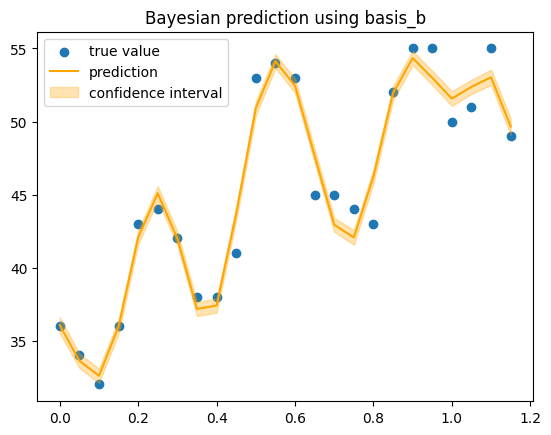

Training error unsing basis_b:  2.263


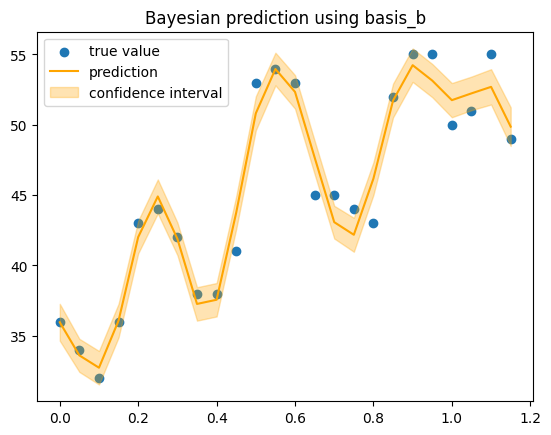

Training error unsing basis_b:  2.294


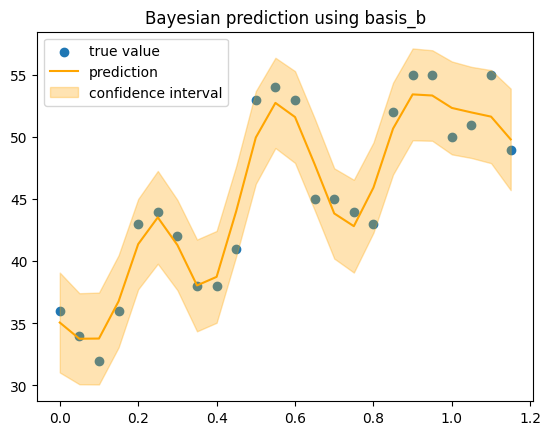

Training error unsing basis_b:  3.123


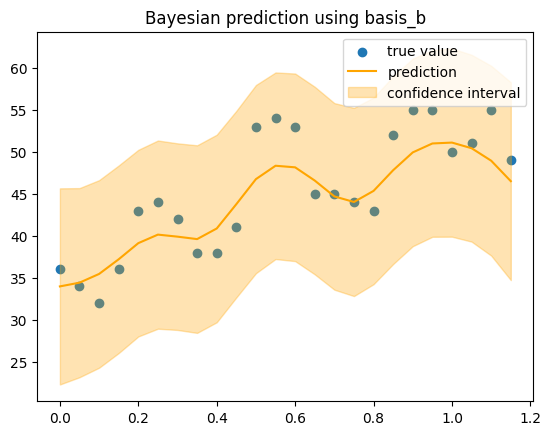

Training error unsing basis_b:  11.550


In [12]:
data = pd.read_csv("year-sunspots-republicans.csv")
data["Year"] = (data["Year"] - 1960)/40
x = data["Year"]
y = data["Republican_Count"]


# try different values of beta 
plot_Bayes(x, y, "basis_b", beta=6)
plot_Bayes(x, y, "basis_b",beta=1)
plot_Bayes(x, y, "basis_b", beta= 0.1)
plot_Bayes(x, y, "basis_b", beta =0.01)


On the above plots, we see that the smaller beta or equivalently the bigger sigma is, the less our model takes into account the data we are given. In the last plot, we clearly see that the regression line does not follow the data very well because our update puts much more weight on the prior. 

$\alpha$ on the other hand is the inverse of the variance of our prior. Hence the smaller is $\alpha$, the biggest is our uncertainty about our prior and therefore our posterior distribution will be updated much more by the likelihood than by the prior distribution. More precisely, looking at the formulas for the posterior mean and variance, for small alpha will give posterior mean equals to the LSE and bigger covariance matrix $S_n$

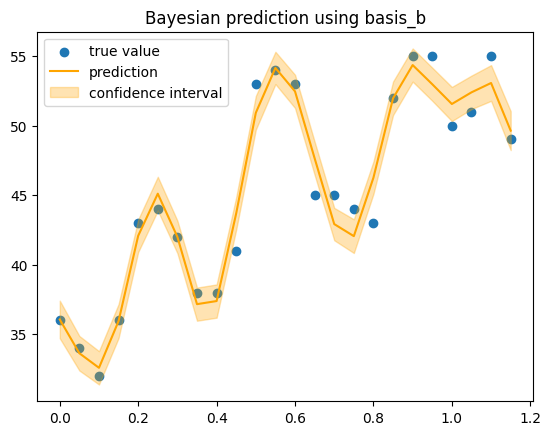

Training error unsing basis_b:  2.262


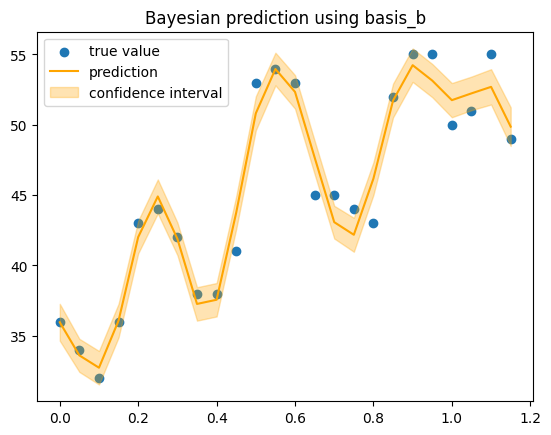

Training error unsing basis_b:  2.294


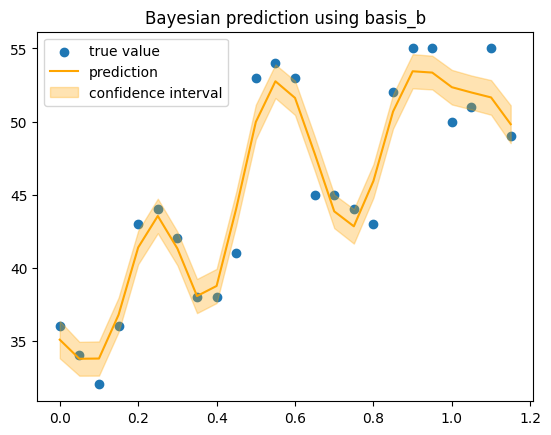

Training error unsing basis_b:  3.123


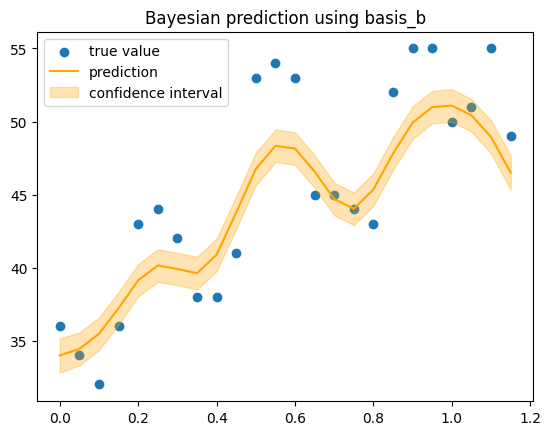

Training error unsing basis_b:  11.550


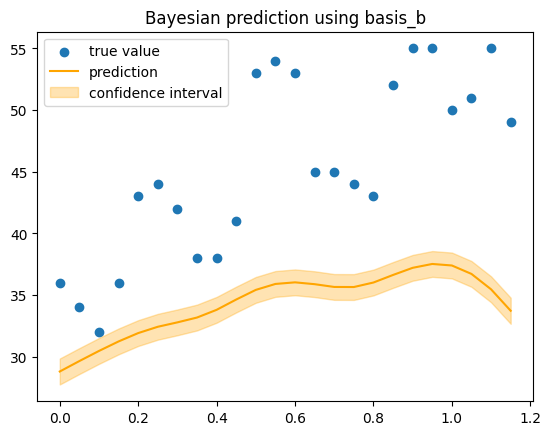

Training error unsing basis_b:  148.786


In [13]:
# try different values of alpha 

plot_Bayes(x, y, "basis_b", alpha =0.001)
plot_Bayes(x, y, "basis_b",alpha=0.01 )
plot_Bayes(x, y, "basis_b",alpha=0.1)
plot_Bayes(x, y, "basis_b", alpha= 1)
plot_Bayes(x, y, "basis_b", alpha =10)


Here we see that for big alpha, that is small uncertainties about our prior, the update does not take into account the data, but only the prior we have set up originally but because we are saying that we are certain of our prior, the posterior variance is very small.
